In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
# Configuración para mostrar gráficos en Jupyter Notebook
%matplotlib inline

In [3]:
# Cargar el conjunto de datos Iris
data = load_iris()
X = data.data
y = data.target


In [4]:
# Convertir las etiquetas a formato one-hot encoding
y = to_categorical(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Introducción al Perceptrón Multicapa (MLP)
El Perceptrón Multicapa (MLP) es un tipo de red neuronal artificial que consiste en múltiples capas de neuronas, conectadas de manera que cada neurona de una capa está conectada a todas las neuronas de la siguiente capa. Estas capas son típicamente:

1. **Capa de Entrada:** Recibe las características del conjunto de datos.
2. **Capas Ocultas:** Procesan las características mediante la aplicación de funciones de activación.
3. **Capa de Salida:** Proporciona el resultado final de la red, que puede ser una clasificación, una regresión, etc.

## Arquitectura del MLP

1. **Capa de Entrada:** En nuestro caso, esta capa tendrá 4 neuronas, correspondientes a las 4 características del conjunto de datos Iris.
2. **Capas Ocultas:** Añadiremos dos capas ocultas con 10 neuronas cada una y una función de activación ReLU.
3. **Capa de Salida:** Tendrá 3 neuronas, correspondientes a las 3 clases del conjunto de datos Iris, con una función de activación softmax para la clasificación.

## Función de Activación ReLU
La función de activación ReLU (Rectified Linear Unit) es una de las funciones de activación más utilizadas en las redes neuronales debido a su simplicidad y efectividad. La ecuación de ReLU es:

$$
\text{ReLU}(x) = \max(0, x)
$$

Esto significa que:

- Si $x$ es mayor que 0, ReLU devuelve $x$.
- Si $x$ es menor o igual a 0, ReLU devuelve 0.

## Construcción del Modelo MLP




###  `activation='softmax'`

La función de activación softmax se utiliza comúnmente en la capa de salida de los modelos de clasificación multiclase. Transforma un vector de valores reales en un vector de probabilidades, donde cada valor está entre 0 y 1 y la suma de todos los valores es igual a 1.

La fórmula de la función softmax para un vector de entrada \(z = [z_1, z_2, ..., z_K]\) es:

$$ \sigma(z)_j = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}} $$

donde $$  \sigma(z)_j  $$ es la probabilidad predicha para la clase $$ (j).$$

### Propiedades y ventajas de la función softmax:

1. **Probabilidades normalizadas**: La salida de softmax proporciona una distribución de probabilidad sobre las clases posibles, lo que es útil para problemas de clasificación.
2. **Diferenciable**: La función softmax es diferenciable, lo que permite utilizarla en el contexto del entrenamiento de redes neuronales mediante retropropagación.
3. **Interpretabilidad**: Las salidas pueden interpretarse directamente como probabilidades, lo que facilita la interpretación de los resultados del modelo.



In [5]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [6]:
# Crear el modelo MLP con Dropout
model_drop = Sequential()
model_drop.add(Dense(10, input_dim=4, activation='relu'))
model_drop.add(Dropout(0.5))  # Dropout con tasa del 50%
model_drop.add(Dense(10, activation='relu'))
model_drop.add(Dropout(0.5))
model_drop.add(Dense(3, activation='softmax'))


C:\Users\caray\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Crear el modelo MLP con función de activación sigmoid
model_sigmoid = Sequential()
model_sigmoid.add(Dense(10, input_dim=4, activation='sigmoid', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa de entrada
model_sigmoid.add(Dropout(0.5))  # Dropout con tasa del 50%
model_sigmoid.add(Dense(10, activation='sigmoid', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa oculta
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(10, activation='sigmoid', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa oculta
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(3, activation='softmax'))  # Capa de salida

In [8]:
# Crear el modelo MLP con función de activación tanh
model_tanh = Sequential()
model_tanh.add(Dense(10, input_dim=4, activation='tanh', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa de entrada
model_tanh.add(Dropout(0.5))  # Dropout con tasa del 50%
model_tanh.add(Dense(10, activation='tanh', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa oculta
model_tanh.add(Dropout(0.5))
model_tanh.add(Dense(10, activation='tanh', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa oculta
model_tanh.add(Dropout(0.5))
model_tanh.add(Dense(3, activation='softmax'))  # Capa de salida

In [9]:
# Crear el modelo MLP con Dropout + Regularización L2
model = Sequential()
#optimizer = keras.optimizers.Adam(lr=0.01)
model.add(Dense(10, input_dim=4, activation='relu', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa de entrada
model.add(Dropout(0.5))  # Dropout con tasa del 50%
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa oculta
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa oculta
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Capa de salida

In [10]:
# Resumen del modelo
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.18 KB)

 Trainable params: 303 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Resumen del modelo
model_drop.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Resumen del modelo
model_sigmoid.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.18 KB)

 Trainable params: 303 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Resumen del modelo
model_tanh.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.18 KB)

 Trainable params: 303 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

## Compilación del Modelo

Para compilar el modelo, necesitamos especificar el optimizador, la función de pérdida y las métricas de evaluación. Usaremos el optimizador Adam y la función de pérdida `categorical_crossentropy` adecuada para problemas de clasificación multiclase.


### Explicación de `optimizer='adam'`

El optimizador Adam (Adaptive Moment Estimation) es uno de los algoritmos de optimización más utilizados en el entrenamiento de redes neuronales. Combina las ventajas de dos otros algoritmos: AdaGrad y RMSProp.

- **AdaGrad** ajusta la tasa de aprendizaje para cada parámetro individualmente, adaptándose al gradiente de manera que los parámetros con gradientes grandes se actualicen más lentamente y los parámetros con gradientes pequeños se actualicen más rápidamente.
- **RMSProp** adapta la tasa de aprendizaje de cada parámetro basándose en la media móvil del cuadrado de los gradientes, lo que permite manejar de manera eficiente la tasa de aprendizaje en presencia de funciones de pérdida no convexas.

Adam combina estas ideas utilizando estimaciones tanto del primer momento (media) como del segundo momento (varianza) de los gradientes:

1. **Media móvil de los gradientes**: Adam calcula una media móvil exponencial de los gradientes del modelo durante el entrenamiento.
2. **Media móvil del cuadrado de los gradientes**: También calcula una media móvil exponencial del cuadrado de los gradientes.
3. **Corrección de sesgo**: Se aplican correcciones de sesgo para las primeras iteraciones.

La fórmula de actualización para los parámetros es:
$$ \theta_t = \theta_{t-1} - \eta \frac{\hat{m_t}}{\sqrt{\hat{v_t}} + \epsilon} $$

donde:
- $$ \theta_t $$ son los parámetros en el paso $$ t $$
- $$ \eta $$ es la tasa de aprendizaje, 
- $$ \hat{m_t} $$ es la media móvil corregida de los gradientes
- $$ \hat{v_t} $$ es la media móvil corregida del cuadrado de los gradientes
- $$ \epsilon $$ es un pequeño valor para evitar la división por cero

Adam es conocido por su eficiencia y robustez en el entrenamiento de redes neuronales profundas.


In [14]:
# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(0.01)
model_drop.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
optimizer = tf.keras.optimizers.Adam(0.01)
model_sigmoid.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
optimizer = tf.keras.optimizers.Adam(0.01)
model_tanh.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
optimizer = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

**Optimizer y Loss se refiere a la Gradiente**

## Entrenamiento del Modelo

Entrenaremos el modelo utilizando los datos de entrenamiento. Especificamos el número de épocas y el tamaño del lote, además de una porción de datos para validación durante el entrenamiento.



In [15]:
# Entrenar el modelo Drop +L2
history = model.fit(X_train, y_train, epochs=20, batch_size=5, validation_split=0.1)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.2447 - loss: 2.3748 - val_accuracy: 0.4167 - val_loss: 1.1876
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3258 - loss: 1.2392 - val_accuracy: 0.4167 - val_loss: 1.1655
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3551 - loss: 1.1773 - val_accuracy: 0.5833 - val_loss: 1.1420
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2183 - loss: 1.1813 - val_accuracy: 0.5833 - val_loss: 1.1294
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4598 - loss: 1.1139 - val_accuracy: 0.5833 - val_loss: 1.1019
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5049 - loss: 1.0970 - val_accuracy: 0.5833 - val_loss: 1.0541
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4602 - loss: 1.0784 - val_accuracy: 0.5833 - val_loss: 1.0010
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4961 - loss: 1.0110 - val_accuracy: 0.5833 - val_loss

In [16]:
# Entrenar el modelo Drop
history_d = model_drop.fit(X_train, y_train, epochs=20, batch_size=5, validation_split=0.1)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3402 - loss: 1.3681 - val_accuracy: 0.5833 - val_loss: 1.0567
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4170 - loss: 1.1197 - val_accuracy: 0.5833 - val_loss: 1.0404
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4942 - loss: 0.9953 - val_accuracy: 0.5833 - val_loss: 0.9982
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6393 - loss: 0.9170 - val_accuracy: 0.5833 - val_loss: 0.8357
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6236 - loss: 0.7778 - val_accuracy: 0.5833 - val_loss: 0.8158
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4575 - loss: 0.9336 - val_accuracy: 0.5833 - val_loss: 0.7866
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6686 - loss: 0.8041 - val_accuracy: 0.7500 - val_loss: 0.6741
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5849 - loss: 0.7963 - val_accuracy: 0.5833 - val_loss

In [17]:
# Entrenar el modelo Sigmoid
history_s = model_sigmoid.fit(X_train, y_train, epochs=20, batch_size=5, validation_split=0.1)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.3703 - loss: 1.4191 - val_accuracy: 0.4167 - val_loss: 1.2440
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3587 - loss: 1.3378 - val_accuracy: 0.1667 - val_loss: 1.2203
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3689 - loss: 1.2297 - val_accuracy: 0.1667 - val_loss: 1.1522
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2701 - loss: 1.1635 - val_accuracy: 0.1667 - val_loss: 1.1503
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3648 - loss: 1.1440 - val_accuracy: 0.1667 - val_loss: 1.1694
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3836 - loss: 1.1182 - val_accuracy: 0.4167 - val_loss: 1.1177
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3654 - loss: 1.1504 - val_accuracy: 0.1667 - val_loss: 1.1287
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4863 - loss: 1.1219 - val_accuracy: 0.4167 - val_los

In [18]:
# Entrenar el modelo Tanh
history_t = model_tanh.fit(X_train, y_train, epochs=20, batch_size=5, validation_split=0.1)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.3124 - loss: 1.4696 - val_accuracy: 0.1667 - val_loss: 1.3649
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3860 - loss: 1.2522 - val_accuracy: 0.5833 - val_loss: 0.9934
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4417 - loss: 1.2511 - val_accuracy: 0.9167 - val_loss: 0.9070
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4428 - loss: 1.1598 - val_accuracy: 0.5833 - val_loss: 0.8405
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5922 - loss: 1.0376 - val_accuracy: 0.6667 - val_loss: 0.7833
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5890 - loss: 0.8550 - val_accuracy: 0.5833 - val_loss: 0.7435
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7545 - loss: 0.7627 - val_accuracy: 0.5833 - val_loss: 0.7201
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6958 - loss: 0.7140 - val_accuracy: 0.5833 - val_loss


## Evaluación del Modelo

Evaluaremos el rendimiento del modelo utilizando los datos de prueba.



In [19]:
# Evaluar el modelo Drop en el conjunto de prueba
loss, accuracy = model_drop.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9333 - loss: 0.4782
Precisión en el conjunto de prueba: 93.33%


In [20]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9000 - loss: 0.5797
Precisión en el conjunto de prueba: 90.00%


In [21]:
# Evaluar el modelo Sigmoid en el conjunto de prueba
loss, accuracy = model_sigmoid.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3333 - loss: 1.1049
Precisión en el conjunto de prueba: 33.33%


In [22]:
# Evaluar el modelo Tanh en el conjunto de prueba
loss, accuracy = model_tanh.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8000 - loss: 0.5110
Precisión en el conjunto de prueba: 80.00%


## Guardar y Cargar el Modelo

Podemos guardar el modelo entrenado para su uso futuro y cargarlo cuando sea necesario.



In [23]:

# Guardar el modelo
model.save('mlp_model_dropout.h5')

# Cargar el modelo
from tensorflow.keras.models import load_model
model = load_model('mlp_model_dropout.h5')


In [24]:
# Guardar el modelo Drop
model_drop.save('mlp_model_dropout.h5')

# Cargar el modelo
from tensorflow.keras.models import load_model
model_drop = load_model('mlp_model_dropout.h5')

In [25]:
# Guardar el modelo Sigmoid
model_sigmoid.save('mlp_model_dropout.h5')

# Cargar el modelo
from tensorflow.keras.models import load_model
model_sigmoid = load_model('mlp_model_dropout.h5')

In [26]:
# Guardar el modelo Tanh
model_tanh.save('mlp_model_dropout.h5')

# Cargar el modelo
from tensorflow.keras.models import load_model
model_tanh = load_model('mlp_model_dropout.h5')

## Visualización de Resultados

Visualizamos la precisión y la pérdida durante el entrenamiento para entender mejor el rendimiento del modelo.


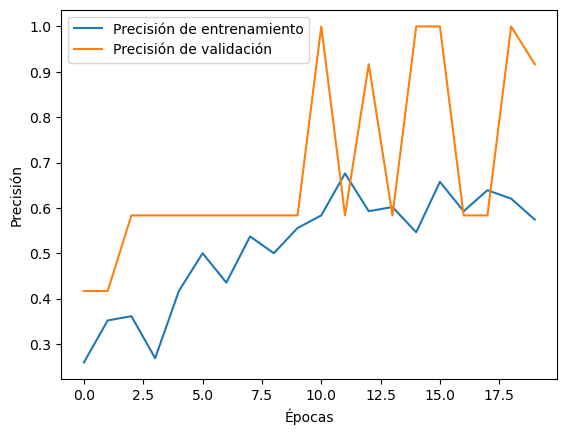

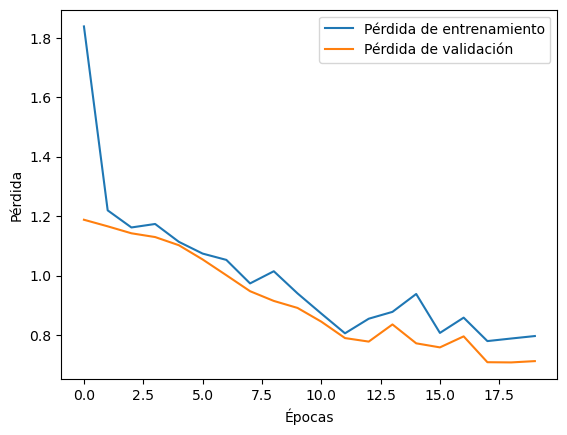

In [27]:
# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


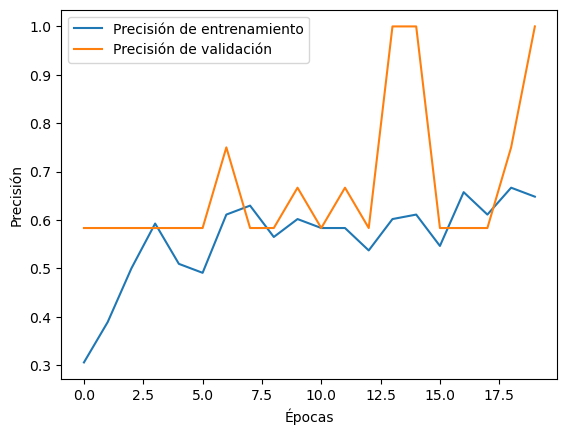

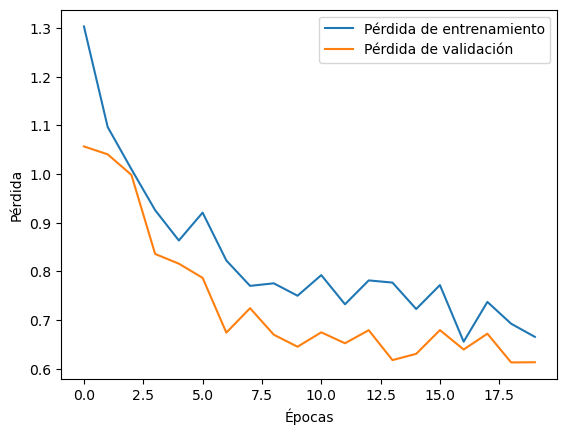

In [28]:
# Graficar la precisión Modelo con Drop
plt.plot(history_d.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history_d.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history_d.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_d.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

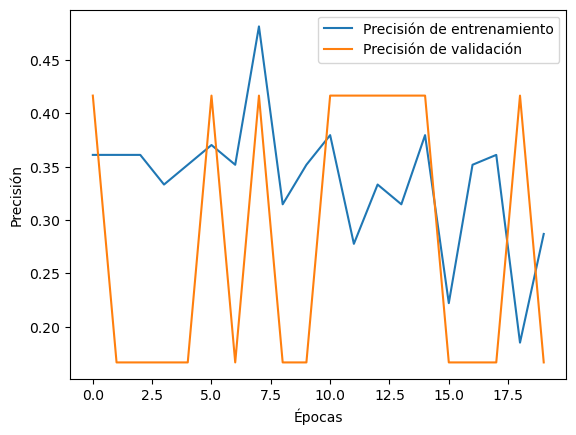

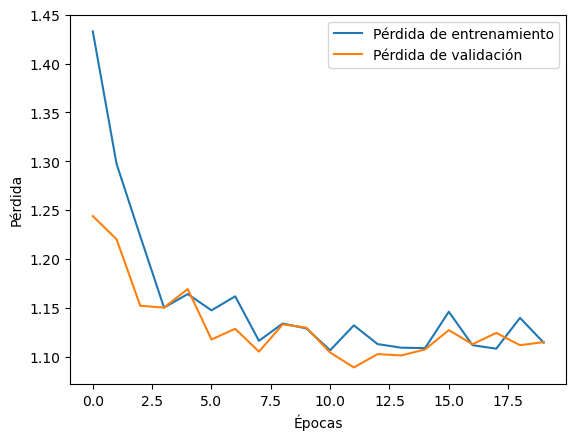

In [29]:
# Graficar la precisión Modelo Sigmoid
plt.plot(history_s.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history_s.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history_s.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_s.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

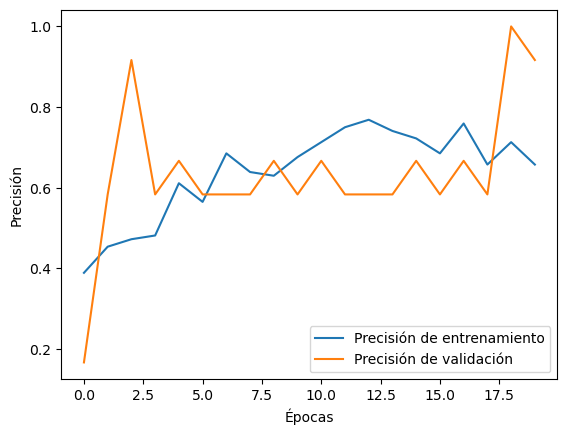

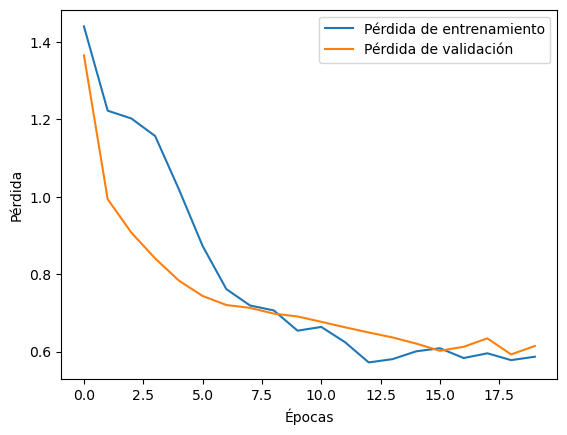

In [30]:
# Graficar la precisión Modelo Tanh
plt.plot(history_t.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history_t.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history_t.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_t.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Desafio 1
* Al cambiar la tasa de aprendizaje a 0.01, el modelo realizara actualizaiones mas grandes (osea mas ajuste en los pesos), lo cual puede llevar mas rapido a una convergencia, pero existe el riesgo de que al realizar saltos mas grandes, esto genere que el modelo se pase del minimo global de la funcion de perdida.
    - Accuracy: 0.66
    - Loss: 0.55

* Al cambiar la tasa de aprendizaje de 0.0001, las actualizaciones de los pesos son mas pequeñas, lo cual permite un ajuste mas preciso y con mayor estabilidad que al utilizar una tasa mas grande. El defecto es que requiere mucho mas tiempo de entrenamiento ya que requerira mas epicas de entrenamiento
    - Accuracy: 0.96
    - Loss: 0.44
## Conclusion
* Modificar la tasa de aprendizaje afecta mucho a la presicion y perdida del modelo, ya que esta impacta directamente en la modificacion de los pesos de los parametros, por lo que si es muy baja, tardara mucho mas en converger, mientras que si es demaciado alta, puede conllevar a tener muchas oscilaciones lo que afectaria al intentar encontrar el minimo global.
    
# Desafio 2
Para este desafio, deberemos de modificar la cantidad de neuronas en "Dense"
* 256 Neuronas por capa Oculta
    - Optimizer = 0.01 -> accuracy: 0.7667 - loss: 0.5554
    - Optimizer = 0.0001 -> accuracy: 0.9667 - loss: 0.3782
    - De estos numeros concluimos que utlizar 256 neuronas por cada capa oculta se obtienen buenos resultados, especialmente para una tasa de aprendizaje del 0.0001, ademas de que no se genera sobreajuste ()
* 1024 Neuronas por capa Oculta
    - Optimizer = 0.1 -> accuracy: 0.7333 - loss: 0.6327
    - Optimizer = 0.0001 -> accuracy: 0.9333 - loss: 3.7440
    - No ofrece ventajas, ademas de que genera una mayor complejidad, lo cual conlleva riesgo de sobreajuste y problemas de optimizacion
## Conclusion
* Con un numero de 256 Neuromas por capa oculta y una tasa del 0.0001, se obtiene un buen rendimiento y equilibrio. Mientras que con 1024 aumenta el riesgo de sobreajuste y problemas de optimizacion.
* Por lo tanto, si bien se puede llegar a pensar que con mas neuronas se llegara a un mejor resultado, esto no es del todo cierto, ya que depende del modelo que se vaya a crear.
    
# Desafio 3
## 10 Epoch
* Tasa de 0.01 
    - accuracy: 0.7333 - loss: 0.6158
* Tasa de 0.0001
    - accuracy: 0.3333 - loss: 1.4638
## 30 Epoch
* Tasa de 0.01
    - accuracy: 0.8667 - loss: 0.4940
* Tasa de 0.0001
    - accuracy: 0.3667 - loss: 1.3719
## Conlcusiones
* Se puede apreciar que para este conjunto de Datos, mientras mas Epoch tenga, mas sera su presicion a la hora de realizar predicciones, ya que estas indican los ciclos de entrenamiento del modelo. Si bien se obtienen buenos numeros con una cantidad de Epoch de 50 con una tasa de apredizaje del 0.0001, No significa que agregando muchas mas se obtenga un mejor resultado, ya que puede conllevar a un sobreajuste
* Se observa Subajuste para los dos casos, especialmente cuando la tasa de aprendizaje es del 0.0001. Si bien para la tasa de 0.1 se obtiene una buena Accuracy, sigue tieniendo una alta perdida, lo cual significa que tiene subajuste.
* Se observa Sobreajste para tasas de entrenamiento grandes como 0.01 y con una gran cantidad de neuronas por cada oculta (Ej: 1024)

# Desafio 4

<img src="resultado1.png">

## Resultado 2
<img src="resultado2.png">

## Resultado 3
<img src="resultado3.PNG">

## Resultado 4
<img src="Resultado4.png">

## Conclusiones

* Utilizando la funcion Sigmoid, nos indica que el modelo no esta aprendiendo adecuadamente. Esto es consistente con el problema del desvanecimiento del gradiente asociado con la función sigmoid, donde los gradientes pueden volverse muy pequeños durante el backpropagation, ralentizando el aprendizaje. Ademas de tener una alta perdida por el ajuste inadecuado de los pesos por
* Utilizando la funcion Tanh. Nos otorga una presicion moderada en la mayoria de los resultados obtenidos, ya que esta centra los datos en torno a "cero" y puede tener mejores gradientes que Sigmoid, lo que ayuda a la convergencia. Ademas, con la perdida de 0.5 indica que el modelo esta haciendo predicciones mas cercanas a las etiquetas verdaderas del modelo (en comparacion con Sigmoid), pero este numero sigue siendo muy alto.
* Si bien el modelo con la funcion de activacion Tanh da resultados parecidos en todos los resultados, utilizar Relu sigue siendo la mejor opcion en modelos de aprendizaje profundo, debido a su capacidad de evitar el desvanecimiento del gradiente, permitiendo una convergencia mas rapida.